In [ ]:
#| include: false
#| default_exp network
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.glycan_data.loader import glycomics_data_loader
human_skin_O_PMC5871710_BCC = glycomics_data_loader.human_skin_O_PMC5871710_BCC
from glycowork.network.biosynthesis import *
from glycowork.network.evolution import *

`network` contains functions to arrange and analyze glycans in the context of networks. In such a network, each node represents a glycan and edges represent, for instance, their connection via a biosynthetic step. It should be noted, since `glycowork` treats glycans as molecular graphs, that these networks represent hierarchical graphs, with the network being one graph and each node within the network also a graph. `network` contains the following modules:

- `biosynthesis` contains functions to construct and analyze biosynthetic glycan networks
- `evolution` contains functions to compare (taxonomic) groups as to their glycan repertoires

## biosynthesis
>constructing and analyzing biosynthetic glycan networks

In [ ]:
show_doc(construct_network)

---

### construct_network

>      construct_network (glycans:List[str],
>                         allowed_ptms:FrozenSet[str]=frozenset({'6S', '3P',
>                         'OS', '3S', '6P', '4Ac', 'OP', '1P', 'OAc', '9Ac'}),
>                         edge_type:str='monolink',
>                         permitted_roots:Optional[FrozenSet[str]]=None,
>                         abundances:List[float]=[])

*Construct glycan biosynthetic network*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | List |  | List of glycans |
| allowed_ptms | FrozenSet | frozenset({'6S', '3P', 'OS', '3S', '6P', '4Ac', 'OP', '1P', 'OAc', '9Ac'}) | Set of allowed PTMs |
| edge_type | str | monolink | Edge label type: monolink/monosaccharide/enzyme |
| permitted_roots | Optional | None | Allowed root nodes |
| abundances | List | [] | Glycan abundances in the same order as glycans; default:empty |
| **Returns** | **DiGraph** |  | **Biosynthetic network** |

In [ ]:
glycans = ["Gal(b1-4)Glc-ol", "GlcNAc(b1-3)Gal(b1-4)Glc-ol",
           "GlcNAc6S(b1-3)Gal(b1-4)Glc-ol",
           "Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol", "Fuc(a1-2)Gal(b1-4)Glc-ol",
          "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol"]
network = construct_network(glycans)
network.nodes()

NodeView(('Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc6S(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Fuc(a1-2)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Gal(b1-3)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-3)]Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc(b1-3)[GlcNAc(b1-6)]Gal(b1-4)Glc-ol', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-3)GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc-ol', 'GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc-ol'))

In [ ]:
show_doc(plot_network)

---

### plot_network

>      plot_network (network:networkx.classes.graph.Graph,
>                    plot_format:str='pydot2', edge_label_draw:bool=True,
>                    lfc_dict:Optional[Dict[str,float]]=None)

*Visualize biosynthetic network*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| plot_format | str | pydot2 | Layout type: pydot2/kamada_kawai/spring |
| edge_label_draw | bool | True | Whether to draw edge labels |
| lfc_dict | Optional | None | Enzyme:log2FC mapping for edge width |
| **Returns** | **None** |  | **Displays plot** |

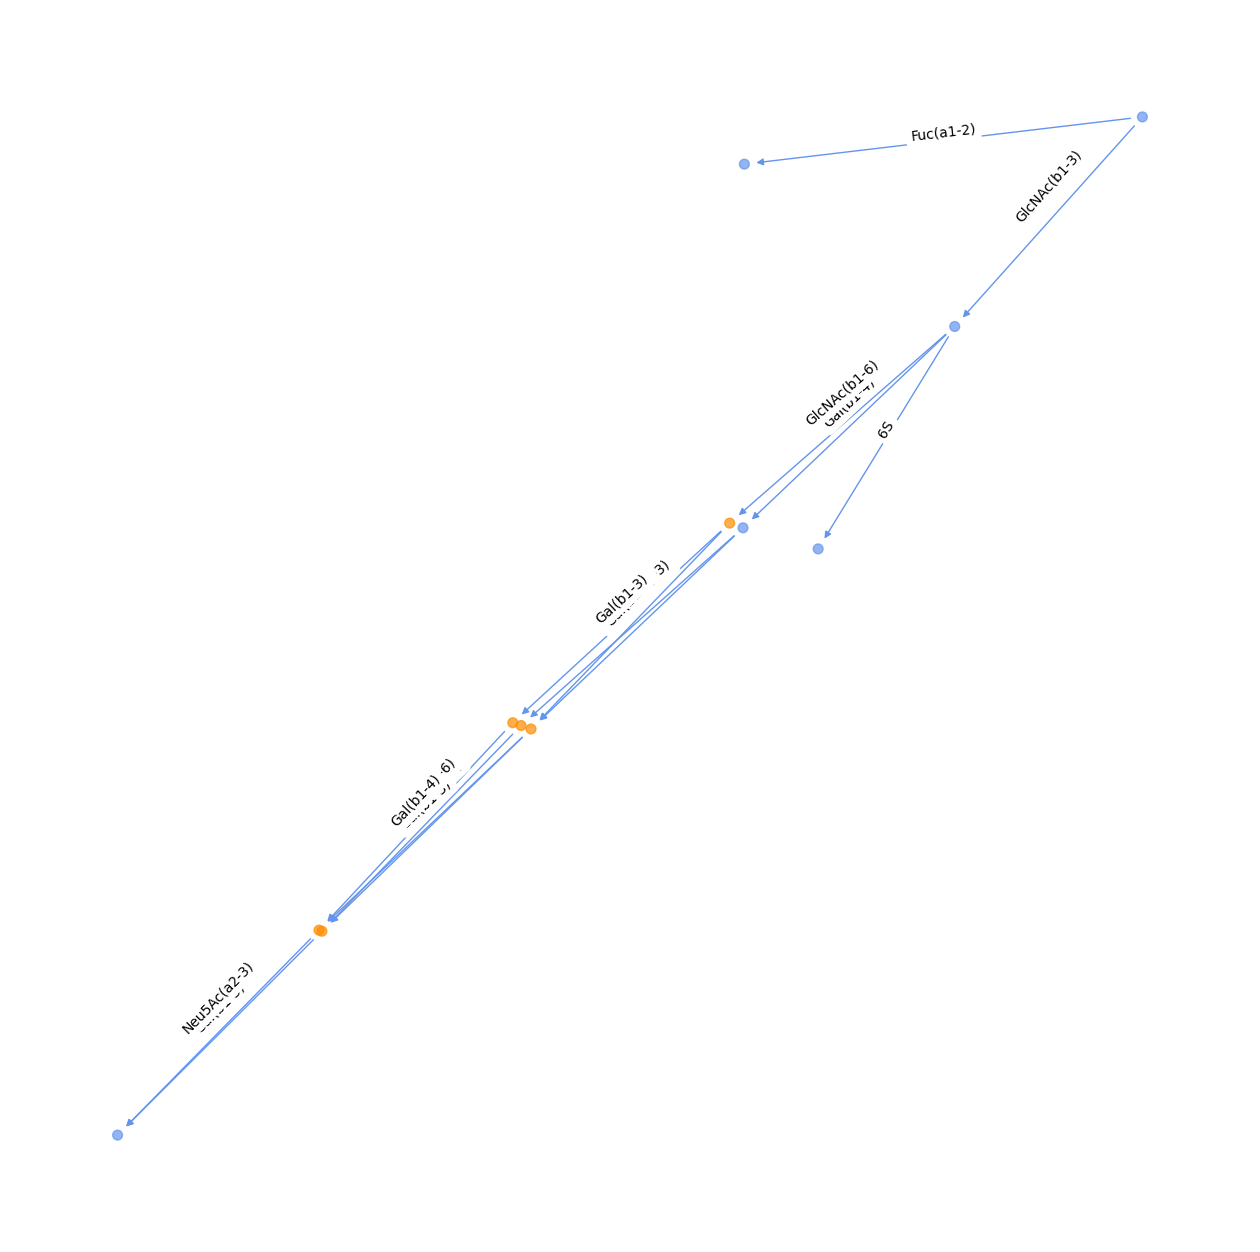

In [ ]:
plot_network(network, plot_format = 'kamada_kawai')

In [ ]:
show_doc(infer_network)

---

### infer_network

>      infer_network (network:networkx.classes.graph.Graph, network_species:str,
>                     species_list:List[str],
>                     network_dic:Dict[str,networkx.classes.graph.Graph])

*Replace virtual nodes observed in other species*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| network | Graph | Network to infer |
| network_species | str | Source species |
| species_list | List | Species to compare against |
| network_dic | Dict | Species:network mapping |
| **Returns** | **Graph** | **Network with inferred nodes** |

In [ ]:
show_doc(retrieve_inferred_nodes)

---

### retrieve_inferred_nodes

>      retrieve_inferred_nodes (network:networkx.classes.graph.Graph,
>                               species:Optional[str]=None)

*Get inferred virtual nodes from network*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Network with inferred nodes |
| species | Optional | None | Source species if multiple |
| **Returns** | **Union** |  | **Inferred nodes list or dict** |

In [ ]:
show_doc(update_network)

---

### update_network

>      update_network (network_in:networkx.classes.graph.Graph,
>                      edge_list:List[Tuple[str,str]],
>                      edge_labels:Optional[List[str]]=None,
>                      node_labels:Optional[Dict[str,int]]=None)

*Update network with new edges and labels*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network_in | Graph |  | Input network |
| edge_list | List |  | List of edges to add |
| edge_labels | Optional | None | Labels for new edges |
| node_labels | Optional | None | Node virtual status (0: observed, 1: virtual) |
| **Returns** | **Graph** |  | **Updated network** |

In [ ]:
show_doc(trace_diamonds)

---

### trace_diamonds

>      trace_diamonds (network:networkx.classes.graph.Graph,
>                      species_list:List[str],
>                      network_dic:Dict[str,networkx.classes.graph.Graph],
>                      threshold:float=0.0, nb_intermediates:int=2,
>                      mode:str='presence')

*Analyze diamond motif (A->B,A->C,B->D,C->D) path preferences using evolutionary data*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| species_list | List |  | Species to compare against |
| network_dic | Dict |  | Species:network mapping |
| threshold | float | 0.0 | Cutoff threshold |
| nb_intermediates | int | 2 | Number of intermediate nodes; has to be a multiple of 2 |
| mode | str | presence | Analysis mode: presence/abundance |
| **Returns** | **DataFrame** |  | **Path analysis results, with proportion (0-1) of how often glycan has been experimentally observed in this path (or average abundance)** |

In [ ]:
show_doc(evoprune_network)

---

### evoprune_network

>      evoprune_network (network:networkx.classes.graph.Graph,
>                        network_dic:Optional[Dict[str,networkx.classes.graph.Gr
>                        aph]]=None, species_list:Optional[List[str]]=None,
>                        node_attr:str='abundance', threshold:float=0.01,
>                        nb_intermediates:int=2, mode:str='presence')

*Prune network using evolutionary path preferences*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| network_dic | Optional | None | Species:network mapping |
| species_list | Optional | None | Species to compare against |
| node_attr | str | abundance | Node attribute to use for pruning |
| threshold | float | 0.01 | Cutoff threshold |
| nb_intermediates | int | 2 | Number of intermediate nodes; has to be a multiple of 2 |
| mode | str | presence | Analysis mode: presence/abundance |
| **Returns** | **Graph** |  | **Evolutionarily pruned network (with virtual node probability as a new node attribute)** |

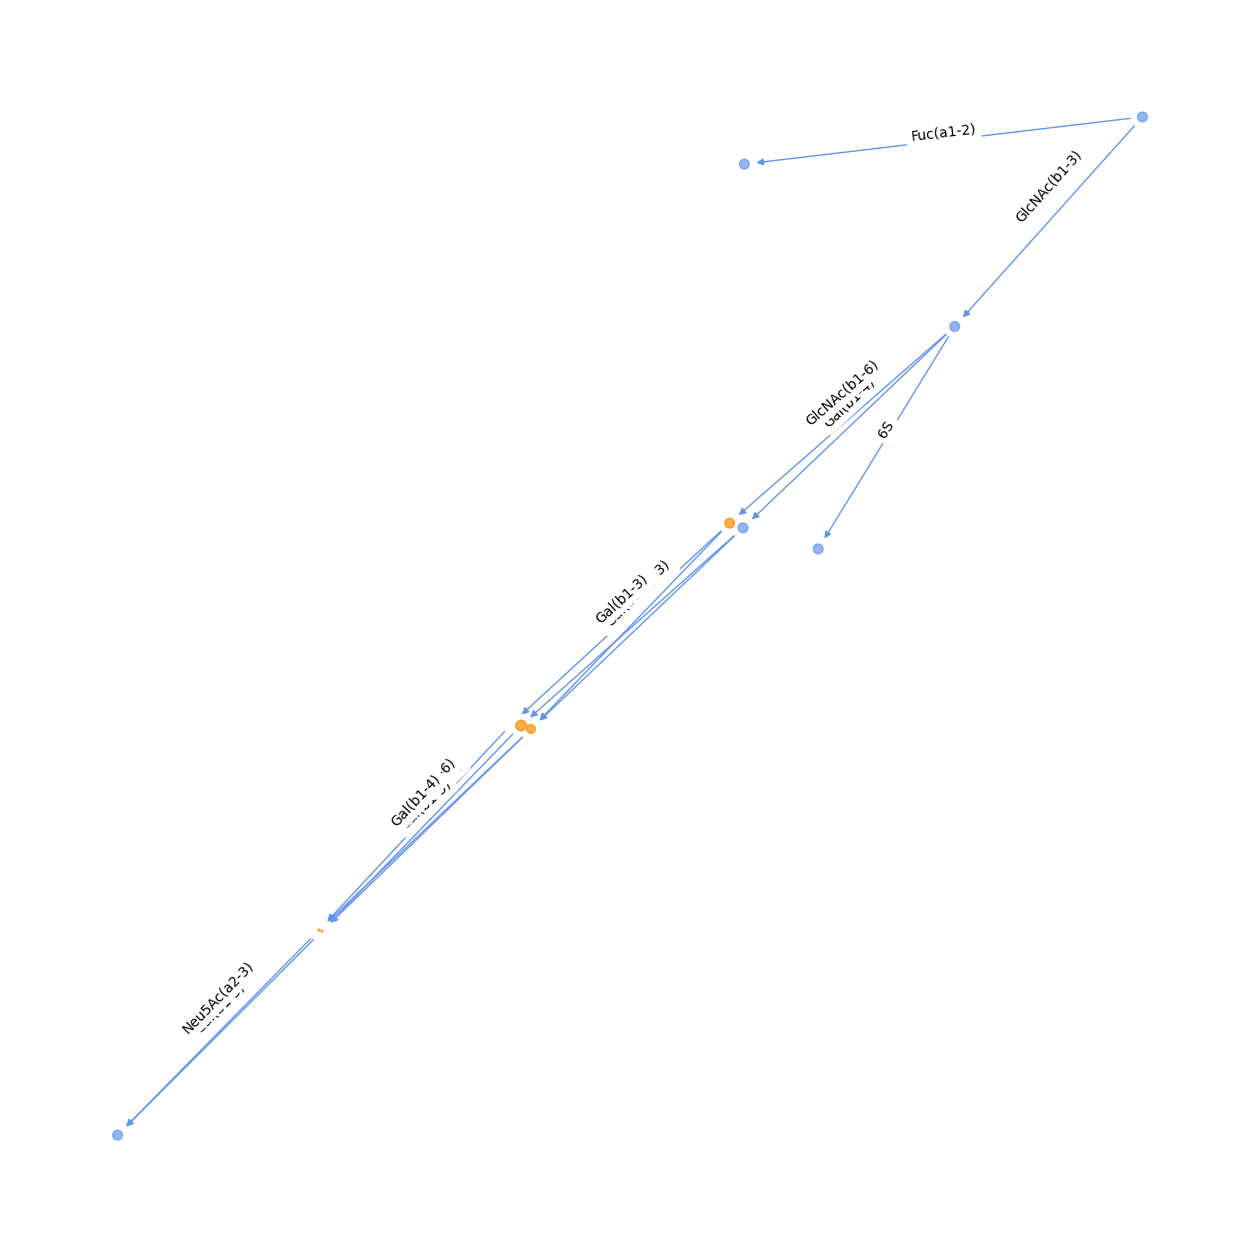

In [ ]:
plot_network(evoprune_network(network), plot_format = 'kamada_kawai')

In [ ]:
show_doc(highlight_network)

---

### highlight_network

>      highlight_network (network:networkx.classes.graph.Graph, highlight:str,
>                         motif:Optional[str]=None, abundance_df:Optional[pandas
>                         .core.frame.DataFrame]=None, glycan_col:str='glycan',
>                         intensity_col:str='rel_intensity', conservation_df:Opt
>                         ional[pandas.core.frame.DataFrame]=None, network_dic:O
>                         ptional[Dict[str,networkx.classes.graph.Graph]]=None,
>                         species:Optional[str]=None)

*Add visual highlighting to network nodes, to be used in plot_network*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| highlight | str |  | What to highlight: motif/species/abundance/conservation |
| motif | Optional | None | Motif to highlight; highlight=motif |
| abundance_df | Optional | None | Glycan abundance data; highlight=abundance |
| glycan_col | str | glycan | Glycan column name; highlight=abundance |
| intensity_col | str | rel_intensity | Intensity column name; highlight=abundance |
| conservation_df | Optional | None | Species-glycan data; highlight=conservation |
| network_dic | Optional | None | Species:network mapping; highlight=conservation/species |
| species | Optional | None | Species to highlight; highlight=species |
| **Returns** | **Graph** |  | **Network with highlight attributes ('origin' (motif/species) or 'abundance' (abundance/conservation) node attribute)** |

In [ ]:
show_doc(export_network)

---

### export_network

>      export_network (network:networkx.classes.graph.Graph, filepath:str,
>                      other_node_attributes:Optional[List[str]]=None)

*Export network to Cytoscape/Gephi compatible files*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| filepath | str |  | Output path prefix, will be appended by file description and type |
| other_node_attributes | Optional | None | Additional attributes for extraction |
| **Returns** | **None** |  | **Saves network files (edge list/labels + node IDs and labels)** |

In [ ]:
show_doc(get_maximum_flow)

---

### get_maximum_flow

>      get_maximum_flow (network:networkx.classes.graph.Graph,
>                        source:str='Gal(b1-4)Glc-ol',
>                        sinks:Optional[List[str]]=None)

*Estimate maximum flow and flow paths between source and sinks*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| source | str | Gal(b1-4)Glc-ol | Source node |
| sinks | Optional | None | Target nodes; default:all terminal nodes |
| **Returns** | **Dict** |  | **Flow results; sink: {maximum flow value, flow path dictionary}** |

In [ ]:
show_doc(get_max_flow_path)

---

### get_max_flow_path

>      get_max_flow_path (network:networkx.classes.graph.Graph,
>                         flow_dict:Dict[str,Dict[str,float]], sink:str,
>                         source:str='Gal(b1-4)Glc-ol')

*Get path giving maximum flow value*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| flow_dict | Dict |  | Flow dictionary as returned by get_maximum_flow |
| sink | str |  | Target node |
| source | str | Gal(b1-4)Glc-ol | Source node |
| **Returns** | **List** |  | **Path edge list** |

In [ ]:
show_doc(get_reaction_flow)

---

### get_reaction_flow

>      get_reaction_flow (network:networkx.classes.graph.Graph,
>                         res:Dict[str,Dict[str,float]],
>                         aggregate:Optional[str]=None)

*Get aggregated flows by reaction type*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| res | Dict |  | Flow results as returned by get_maximum_flow |
| aggregate | Optional | None | Aggregation: sum/mean/None |
| **Returns** | **Union** |  | **Reaction flows (reaction: flow)** |

In [ ]:
show_doc(get_differential_biosynthesis)

---

### get_differential_biosynthesis

>      get_differential_biosynthesis (df:Union[pandas.core.frame.DataFrame,str],
>                                     group1:List[Union[str,int]], group2:Option
>                                     al[List[Union[str,int]]]=None,
>                                     analysis:str='reaction',
>                                     paired:bool=False,
>                                     longitudinal:bool=False,
>                                     id_column:str='ID')

*Compare biosynthetic patterns between conditions/timepoints*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | Glycan abundance data (first column: glycan sequences) |
| group1 | List |  | First group column indices/names (or time points in longitudinal analysis) |
| group2 | Optional | None | Second group column indices/names (or time points in longitudinal analysis) |
| analysis | str | reaction | Type: reaction/flow |
| paired | bool | False | Whether samples are paired |
| longitudinal | bool | False | Whether to do perform longitudinal analysis |
| id_column | str | ID | Sample ID column for longitudinal analysis in the ID-style of participant_time_replicate |
| **Returns** | **DataFrame** |  | **Differential analysis results (differential flow features and statistics OR reaction changes over time** |

In [ ]:
get_differential_biosynthesis(human_skin_O_PMC5871710_BCC, [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                              [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], paired = True)

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Mean abundance,Log2FC,p-val,corr p-val,significant,Effect size
Feature,,,,,,
Neu5Ac(a2-3),4.542537,-0.391611,0.001702,0.003147,True,-0.816234
Gal(b1-?),3.395793,-0.435594,0.002206,0.003147,True,-0.790748
Gal(b1-3),5.967389,-0.460385,0.003713,0.003147,True,-0.739291
Neu5Ac(a2-?),4.193290,-0.449044,0.004196,0.003147,True,-0.727147
Neu5Ac(a2-6),5.143191,-0.496132,0.007521,0.004513,True,-0.668654
Neu5Ac(a2-8),2.894141,-0.464140,0.013887,0.006944,True,-0.605967
OS,2.249050,-0.521844,0.019236,0.008244,True,-0.571950
6S,0.824198,-0.270074,0.050454,0.015136,True,-0.466992
GlcNAc(b1-6),0.824198,-0.270074,0.050454,0.015136,True,-0.466992


In [ ]:
show_doc(extend_network)

---

### extend_network

>      extend_network (network:networkx.classes.graph.Graph, steps:int=1,
>                      to_extend:Union[str,Dict[str,int],List[str]]='all',
>                      strict_context:bool=False)

*Extend biosynthetic network physiologically*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network | Graph |  | Biosynthetic network |
| steps | int | 1 | Number of extension steps; default:1 |
| to_extend | Union | all | Nodes to extend (all, specific leaf node, target composition) |
| strict_context | bool | False | Whether to use network only to derive allowed reaction products; default:False |
| **Returns** | **Tuple** |  | **(Extended network, New glycans)** |

In [ ]:
new_network, new_glycans = extend_network(network, strict_context = True)
len(new_glycans)

20

## evolution
>investigating evolutionary relationships of glycans

In [ ]:
show_doc(distance_from_embeddings)

---

### distance_from_embeddings

>      distance_from_embeddings (df:pandas.core.frame.DataFrame,
>                                embeddings:pandas.core.frame.DataFrame,
>                                cut_off:int=10, rank:str='Species',
>                                averaging:str='median')

*Calculate cosine distance matrix from learned embeddings*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | DataFrame with glycans (rows) and taxonomic info (columns) |
| embeddings | DataFrame |  | DataFrame with glycans (rows) and embeddings (columns) (e.g., from glycans_to_emb) |
| cut_off | int | 10 | Minimum glycans per rank to be included; default:10 |
| rank | str | Species | Taxonomic rank for grouping; default:Species |
| averaging | str | median | How to average embeddings: median/mean |
| **Returns** | **DataFrame** |  | **Rank x rank distance matrix** |

In [ ]:
show_doc(distance_from_metric)

---

### distance_from_metric

>      distance_from_metric (df:pandas.core.frame.DataFrame,
>                            networks:List[networkx.classes.graph.Graph],
>                            metric:str='Jaccard', cut_off:int=10,
>                            rank:str='Species')

*Calculate distance matrix between networks using provided metric*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | DataFrame with glycans (rows) and taxonomic info (columns) |
| networks | List |  | List of networkx networks |
| metric | str | Jaccard | Distance metric to use |
| cut_off | int | 10 | Minimum glycans per rank to be included; default:10 |
| rank | str | Species | Taxonomic rank for grouping; default:Species |
| **Returns** | **DataFrame** |  | **Rank x rank distance matrix** |

In [ ]:
show_doc(dendrogram_from_distance)

---

### dendrogram_from_distance

>      dendrogram_from_distance (dm:pandas.core.frame.DataFrame,
>                                ylabel:str='Mammalia', filepath:str='')

*Plot dendrogram from distance matrix*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| dm | DataFrame |  | Rank x rank distance matrix (e.g., from distance_from_embeddings) |
| ylabel | str | Mammalia | Y-axis label |
| filepath | str |  | Path to save plot including filename |
| **Returns** | **None** |  | **Displays or saves dendrogram plot** |

In [ ]:
show_doc(check_conservation)

---

### check_conservation

>      check_conservation (glycan:str, df:pandas.core.frame.DataFrame,
>                          network_dic:Optional[Dict[str,networkx.classes.graph.
>                          Graph]]=None, rank:str='Order', threshold:int=5,
>                          motif:bool=False)

*Estimate evolutionary conservation of glycans via biosynthetic networks*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan or motif in IUPAC-condensed format |
| df | DataFrame |  | DataFrame with glycans (rows) and taxonomic levels (columns) |
| network_dic | Optional | None | Species:biosynthetic network mapping |
| rank | str | Order | Taxonomic level to assess |
| threshold | int | 5 | Minimum glycans per species to be included |
| motif | bool | False | Whether glycan is a motif vs sequence |
| **Returns** | **Dict** |  | **Taxonomic group-to-conservation mapping** |

In [ ]:
show_doc(get_communities)

---

### get_communities

>      get_communities (network_list:List[networkx.classes.graph.Graph],
>                       label_list:Optional[List[str]]=None)

*Find communities for each graph in list of graphs*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| network_list | List |  | List of undirected biosynthetic networks |
| label_list | Optional | None | Labels for community names, running_number + _ + label_list[k]  for network_list[k]; default:range(len(graph_list)) |
| **Returns** | **Dict** |  | **Community-to-glycan list mapping** |

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()